# DAT-NYC-37 | Codealong and Lab 15 | Natural Language Processing and Text Classification

# Codealong - Text Processing with `sklearn`

In [143]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import feature_extraction, ensemble, cross_validation, metrics

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

The data is about sentiments on Amazon reviews. The data is in a "raw" format where the review and it's score are separated by tabs (`\t` character). We'll first need to parse it:

<small>
<pre>
\tIt clicks into place in a way that makes you wonder how long that mechanism would last.\t0
\tI went on Motorola's website and followed all directions, but could not get it to pair again.\t0
</pre>
</small>

In [144]:
# Simple input parsing
reviews = []
sentiments = []

with open(os.path.join('..', '..', 'datasets', 'amazon-reviews.txt')) as f:
    for line in f.readlines():
        line = line.strip('\n')
        # `.split` splits a string into an array from some delimiter: `"foo,bar".split == ["foo", "bar"]`
        review, sentiment = line.split('\t')
        sentiment = np.nan if sentiment == '' else int(sentiment)

        # Store the review and sentiment in their respective lists
        reviews.append(review)
        sentiments.append(sentiment)

# Construct the dataframe (keys of the dictionary become columns of the DataFrame)
df = pd.DataFrame({'review': reviews, 'sentiment': sentiments})

In [34]:
df.head()

,review,sentiment
0,I try not to adjust the volume setting to avoi...,NaN
1,So there is no way for me to plug it in here i...,0.0
2,"Good case, Excellent value.",1.0
3,I thought Motorola made reliable products!.,NaN
4,Battery for Motorola Razr.,NaN


In [145]:
df.dropna(inplace = True) # Let's drop NaNs

In [146]:
df.head()

,review,sentiment
1,So there is no way for me to plug it in here i...,0.0
2,"Good case, Excellent value.",1.0
5,Great for the jawbone.,1.0
10,Tied to charger for conversations lasting more...,0.0
11,The mic is great.,1.0


In [147]:
X = df.review
y = df.sentiment

## Part 1: Applying `CountVectorizer`

`CountVectorizer` converts a collection of text into a matrix of features.  Each row will be a sample (an article or piece of text) and each column will be a text feature (usually a count or binary feature per word).

**`CountVectorizer` takes a column of text and creates a new dataset.**  It generates a feature for every word in all of the pieces of text.

CAUTION: Using all of the words can be useful, but we may need to use regularization to avoid overfitting.  Otherwise, rare words may cause the model to overfit and not generalize.

(And check http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html as needed)

In [178]:
# Instantiate a new CountVectorizer

# Stopwords are non-content words.  (e.g. 'to', 'the', and 'it')
# They aren’t helpful for prediction, so we remove them.
# We'll almost always want to specify `stop_words = 'english'` to exclude stop words
vectorizer = feature_extraction.text.CountVectorizer(stop_words = 'english', max_features=2000, ngram_range=(1, 3))

In [179]:
vectorizer

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=2000, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Vectorizers are like other models in `sklearn`:
- We create a vectorizer object with the parameters of our feature space
- We fit a vectorizer to learn the vocabulary
- We transform a set of text into that feature space

Note: there is a distinction between fit and transform:
- We fit from our training set.  This is part of the model building process, so we don't look at our test set
- We transform our test set using our model fit on the training set

In [180]:
# TODO: Fit and transform the reviews using the CountVectorizer you've just defined
# Store the results in a dataframe named `X_vectorized`

# YOUR CODE HERE...
X_vectorized = vectorizer.fit_transform(X)

**Note**: While dense matrices store every entry in the matrix, sparse matrices only store the nonzero entries.  Sparse matrices don't have a lot of extra features, and some algorithms may not work for them so you use them when you need to work with matrices that would be too big for the computer to handle them, but they are mostly zero, so they compress easily.  You can convert from sparse matrices to dense matrices with `.todense()`

In [181]:
# Make sure it's correct
X_vectorized.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [182]:
# Check that the size of `vectorized_X` makes sense:

X_vectorized.shape


(1000, 2000)

In [183]:
# Q: What are the 10 most commonly used words in our training set?

## Part 2: Train/test split

*We'll start with a simple train/test split*

In [184]:
train_X, test_X, train_y, test_y = cross_validation.train_test_split(X_vectorized, y, test_size = 0.3, random_state=1)

## Part 3: Fitting the Model: Random Forest

We can now build a random forest model to predict "sentiment".

In [185]:
# Define a RandomForest classifier that trains 20 decision trees, store your model in a dataframe called `rf_model`


# YOUR CODE HERE
# rf_model = 

rf_model = ensemble.RandomForestClassifier(n_estimators=1000)

In [186]:
# Fit your classifier against the training data

# YOUR CODE HERE
rf_model.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [167]:
# Review Q: Why are we using a Random Forest model here instead of a decision tree?

## Part 4: Evaluating our model on the test dataset

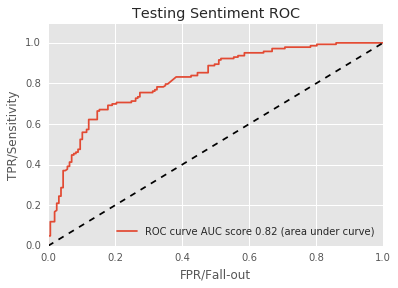

TEST AUC Score: 0.819


In [190]:
# TODO: Use the following code to calculate the AUC score on the test dataset:

test_y_hat = rf_model.predict_proba(test_X)

fpr, tpr, thresholds = metrics.roc_curve(test_y, test_y_hat[:, 1])

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve AUC score %0.2f (area under curve)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([.0, 1.])
plt.ylim([.0, 1.1])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title('Testing Sentiment ROC')
plt.legend(loc = 'lower right')
plt.show()

print "TEST AUC Score: %0.3f" % metrics.auc(fpr, tpr)

# import seaborn as sns
#
# plt.figure()
# sns.distplot(fpr, color="red", bins=10)
# sns.distplot(tpr, color="green", bins=10);

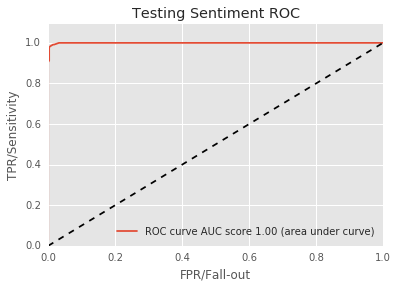

TEST AUC Score: 0.999


In [191]:
# Generate the AUC score for your in-sample (training) data

# YOUR CODE HERE

# TODO: Use the following code to calculate the AUC score on the test dataset:

train_y_hat = rf_model.predict_proba(train_X)

fpr, tpr, thresholds = metrics.roc_curve(train_y, train_y_hat[:, 1])

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve AUC score %0.2f (area under curve)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([.0, 1.])
plt.ylim([.0, 1.1])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title('Testing Sentiment ROC')
plt.legend(loc = 'lower right')
plt.show()

print "TEST AUC Score: %0.3f" % metrics.auc(fpr, tpr)

# import seaborn as sns
#
# plt.figure()
# sns.distplot(fpr, color="red", bins=10)
# sns.distplot(tpr, color="green", bins=10);

In [170]:
# Q: Are we overfitting? Why or why not? How can you tell?

In [126]:
# Q: If so, what can you do about it?

# TF-IDF

Directions: Redo the analysis above with `TfidfVectorizer` instead of `CountVectorizer`. Use 20 estimators for your Random Forest Classifier.  What results do you get?

(Check http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html as needed)

In [ ]:
# Q: What words have the highest Tf-Idf? What does this indicate?
# A:

In [ ]:
# TODO: Your modeling Analysis here:


## Bonus Questions/Exercises:

- Which features are most important? (hint: Read the docs: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- Use `cross_val_score` instead of a simple train/test split. How much does your model improve?
- In your own words*, describe what `cross_val_score` is doing
- Try including larger n_grams (e.g. 2 or 3) in your analysis. Does this improve your results?
- Why might using KNN be a bad idea on this dataset?